# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'train.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('Data Loaded Successfully...')

Data Loaded Successfully...


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Step 1.1: Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import pandas
import csv
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# Number of validation examples
n_valid = X_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
with open('signnames.csv', 'rt',encoding='utf-8') as csvfile:
    classes_data = csv.reader(csvfile)
    n_classes=-1
    for i in classes_data:
        n_classes=n_classes+1
    

print("Number of training examples =",  X_train.shape)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = (34799, 32, 32, 3)
Number of testing examples = 34799
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Step 1.2: Select an image randomly and output it

12


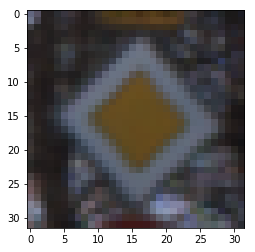

In [5]:
### This code cell outputs a random image from the training dataset
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
rand_idx=random.randint(0,n_train)
img2plt=X_train[rand_idx].squeeze()
plt.imshow(img2plt)
print(y_train[rand_idx])

### Step 1.3: Select an image from each class and output it

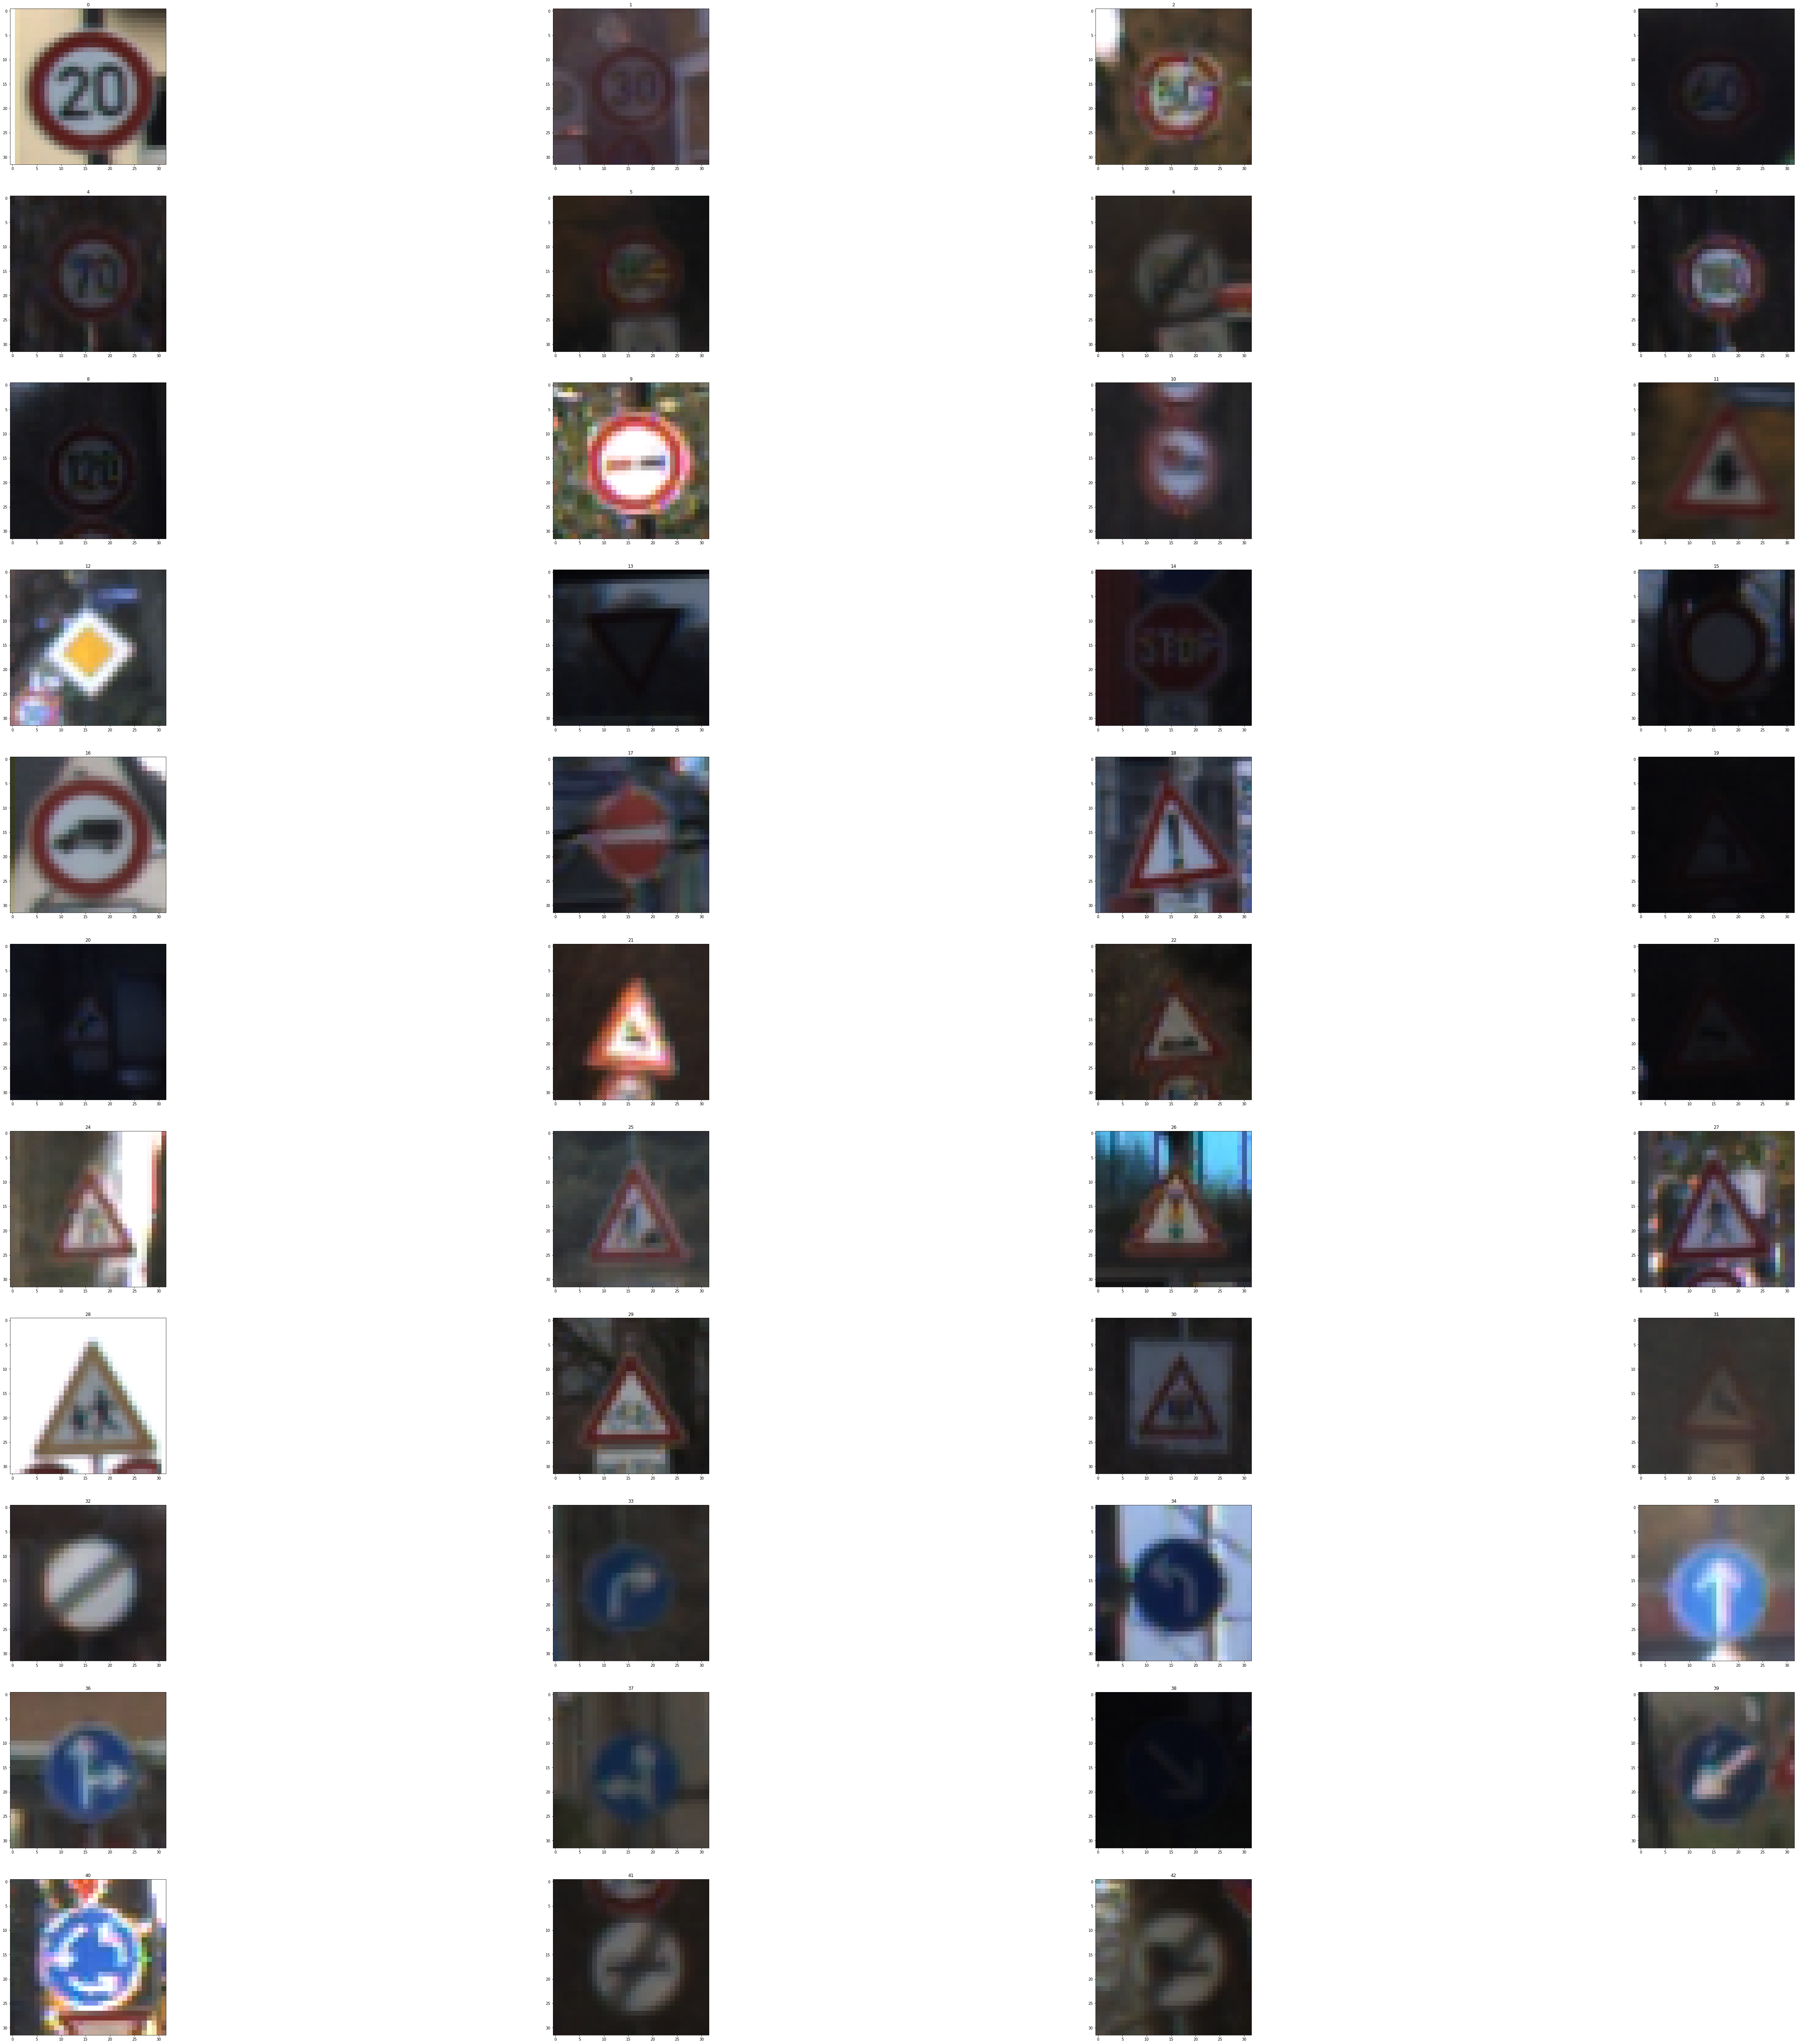

In [7]:
#### Optional: Picks a traffic sign of each class and displays it
fig=plt.figure(figsize=(100,100))
im_list=[]
for i in range(n_classes):
    for idx,m in enumerate(y_train):
        if i==m:
            img2plt=X_train[idx].squeeze()
            im_list.append(img2plt)
            ax = fig.add_subplot(int(n_classes/4)+1,4,i+1)
            ax.imshow(img2plt)
            ax.set_title(str(i))
            break


### Step 1.4: Pre-process the Data Set (normalization and histogram equalization)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
def normalize_from_rgb(np_array,lower_limit=0.1,upper_limit=0.9):
    return (np_array*((upper_limit-lower_limit)/255)+lower_limit)

In [6]:
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

In [7]:
from sklearn.utils import shuffle
import cv2
import numpy as np
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train,y_train=shuffle(X_train,y_train)
for i in range(n_train):
    for chnl in range(3):
        X_train[i,:,:,chnl]=image_histogram_equalization(X_train[i,:,:,chnl])[0]
print('Training Set Histogram equalized')
for i in range(n_valid):
    for chnl in range(3):
        X_valid[i,:,:,chnl]=image_histogram_equalization(X_valid[i,:,:,chnl])[0]
print('Validation Set Histogram equalized')
for i in range(n_test):
    for chnl in range(3):
        X_test[i,:,:,chnl]=image_histogram_equalization(X_test[i,:,:,chnl])[0]
print('Testing Set Histogram equalized')
X_train=normalize_from_rgb(X_train)
X_valid=normalize_from_rgb(X_valid)
X_test=normalize_from_rgb(X_test)
print('Done')

Training Set Histogram equalized
Validation Set Histogram equalized
Testing Set Histogram equalized
Done


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Step 2.1: Model Architecture

In [8]:
# Preparation
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def ClassifierNN(input_image):
    
    ############# Hyper Parameters ###################
    mu=0.01
    sigma=0.1
    ################# Layer 1 ######################## (IN:32X32X3) 
    #Conv:
    conv1_W=tf.Variable(tf.truncated_normal(shape=(5,5,3,16),mean=mu,stddev=sigma),name='w1')
    conv1_b=tf.Variable(tf.zeros(16),name='b1')
    conv1=tf.nn.conv2d(input_image,conv1_W,strides=[1,1,1,1],padding='VALID')+conv1_b
    #Activation:
    conv1=tf.nn.relu(conv1)
    #Pooling
    conv1=tf.nn.avg_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') #Consider avg_pool
    ################# Layer 2 ######################## (IN: 14X14X16)
    #Conv:
    conv2_W=tf.Variable(tf.truncated_normal(shape=(5,5,16,42),mean=mu,stddev=sigma),name='w2')
    conv2_b=tf.Variable(tf.zeros(42),name='b2')
    conv2=tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding='VALID')+conv2_b
    #Activation:
    conv2=tf.nn.relu(conv2)
    #Pooling
    conv2=tf.nn.avg_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') #Consider avg_pool
    ################# Layer 3 ######################## (IN: 5X5X42)
    #Linear:
    flat_l2=flatten(conv2)
    flat_l3_W=tf.Variable(tf.truncated_normal(shape=(1050,640),mean=mu,stddev=sigma),name='w3')
    flat_l3_b=tf.Variable(tf.zeros(640),name='b3')
    flat_l3=tf.matmul(flat_l2,flat_l3_W)+flat_l3_b
    #Activation:
    flat_l3=tf.nn.relu(flat_l3)
    ################# Layer 4 ######################## (IN: 640)
    #Linear:
    flat_l4_W=tf.Variable(tf.truncated_normal(shape=(640,300),mean=mu,stddev=sigma),name='w4')
    flat_l4_b=tf.Variable(tf.zeros(300),name='b4')
    flat_l4=tf.matmul(flat_l3,flat_l4_W)+flat_l4_b
    #Activation:
    flat_l4=tf.nn.relu(flat_l4)
    ################# Layer 5 ######################## (IN: 300)
    #Linear:
    flat_l5_W=tf.Variable(tf.truncated_normal(shape=(300,43),mean=mu,stddev=sigma),name='w5')
    flat_l5_b=tf.Variable(tf.zeros(43),name='b5')
    flat_l5=tf.matmul(flat_l4,flat_l5_W)+flat_l5_b
    #Activation:
    logits=tf.nn.relu(flat_l5)
    tf.add_to_collection('vars', conv1_W)
    tf.add_to_collection('vars', conv1_b)
    tf.add_to_collection('vars', conv2_W)
    tf.add_to_collection('vars', conv2_b)
    tf.add_to_collection('vars', flat_l3_W)
    tf.add_to_collection('vars', flat_l3_b)
    tf.add_to_collection('vars', flat_l4_W)
    tf.add_to_collection('vars', flat_l4_b)
    tf.add_to_collection('vars', flat_l5_W)
    tf.add_to_collection('vars', flat_l5_b)
    return logits

x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)

In [ ]:
'''### Six Layer NN archeticture
def ClassifierNN(input_image):
    
    ############# Hyper Parameters ###################
    mu=0.015
    sigma=0.1
    ################# Layer 1 ######################## (IN:32X32X3) 
    #Conv:
    conv1_W=tf.Variable(tf.truncated_normal(shape=(5,5,3,32),mean=mu,stddev=sigma),name='w1')
    conv1_b=tf.Variable(tf.zeros(32),name='b1')
    conv1=tf.nn.conv2d(input_image,conv1_W,strides=[1,1,1,1],padding='VALID')+conv1_b
    #Activation:
    conv1=tf.nn.relu(conv1)
    #Pooling
    #conv1=tf.nn.avg_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') #Consider avg_pool
    ################# Layer 2 ######################## (IN: 28X28X32)
    #Conv:
    conv2_W=tf.Variable(tf.truncated_normal(shape=(5,5,32,48),mean=mu,stddev=sigma),name='w2')
    conv2_b=tf.Variable(tf.zeros(48),name='b2')
    conv2=tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding='VALID')+conv2_b
    #Activation:
    conv2=tf.nn.relu(conv2)
    #Pooling
    #conv2=tf.nn.avg_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') #Consider avg_pool
    ################# Layer 3 ######################## (IN: 24X24X48)
    #Conv:
    #flat_l2=flatten(conv2)
    conv3_W=tf.Variable(tf.truncated_normal(shape=(5,5,48,96),mean=mu,stddev=sigma),name='w3')
    conv3_b=tf.Variable(tf.zeros(96),name='b3')
    conv3=tf.nn.conv2d(conv2,conv3_W,strides=[1,1,1,1],padding='VALID')+conv3_b
    #Activation:
    conv3=tf.nn.relu(conv3)
    #Pooling
    conv3=tf.nn.avg_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    ################# Layer 4 ######################## (IN: 7776)
    #Linear:
    flat_l3=flatten(conv3)
    flat_l4_W=tf.Variable(tf.truncated_normal(shape=(9600,2040),mean=mu,stddev=sigma),name='w4')
    flat_l4_b=tf.Variable(tf.zeros(2040),name='b4')
    flat_l4=tf.matmul(flat_l3,flat_l4_W)+flat_l4_b
    #Activation:
    flat_l4=tf.nn.relu(flat_l4)
    ################# Layer 5 ######################## (IN: 2040)
    #Linear:
    flat_l5_W=tf.Variable(tf.truncated_normal(shape=(2040,512),mean=mu,stddev=sigma),name='w4')
    flat_l5_b=tf.Variable(tf.zeros(512),name='b5')
    flat_l5=tf.matmul(flat_l4,flat_l5_W)+flat_l5_b
    #Activation:
    flat_l5=tf.nn.relu(flat_l5)
    ################# Layer 6 ######################## (IN: 512)
    #Linear:
    flat_l6_W=tf.Variable(tf.truncated_normal(shape=(512,43),mean=mu,stddev=sigma),name='w5')
    flat_l6_b=tf.Variable(tf.zeros(43),name='b6')
    flat_l6=tf.matmul(flat_l5,flat_l6_W)+flat_l6_b
    #Activation:
    logits=tf.nn.relu(flat_l6)
    tf.add_to_collection('vars', conv1_W)
    tf.add_to_collection('vars', conv1_b)
    tf.add_to_collection('vars', conv2_W)
    tf.add_to_collection('vars', conv2_b)
    tf.add_to_collection('vars', conv3_W)
    tf.add_to_collection('vars', conv3_b)
    tf.add_to_collection('vars', flat_l4_W)
    tf.add_to_collection('vars', flat_l4_b)
    tf.add_to_collection('vars', flat_l5_W)
    tf.add_to_collection('vars', flat_l5_b)
    tf.add_to_collection('vars', flat_l6_W)
    tf.add_to_collection('vars', flat_l6_b)
    return logits

x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)'''

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Step 2.2: Train Pipeline

In [11]:
#Parameters:
rate=0.0001
epochs=200
batch_size=128

In [12]:
logits=ClassifierNN(x)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_sum(cross_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate=rate)
training_operation=optimizer.minimize(loss_operation)

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Step 2.3: Evaluation Pipeline

In [14]:
corrrect_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(corrrect_prediction,tf.float32))

def evaluate_accuracy(NN_input,NN_output):
    n_ex=len(NN_input)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,n_ex,batch_size):
        batch_input,batch_output=NN_input[offset:offset+batch_size],NN_output[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_input,y:batch_output})
        total_accuracy+=(accuracy*len(batch_input))
    return total_accuracy/n_ex

#### Step 2.4: NN Trainer

In [16]:
try:
    saver
except NameError:
    saver=tf.train.Saver(tf.trainable_variables())

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_train=len(X_train)
    print('Training just started...')
    for i in range(epochs):
        for offset in range(0,num_train,batch_size):
            batch_input,batch_output=X_train[offset:offset+batch_size],y_train[offset:offset+batch_size]
            sess.run(training_operation,feed_dict={x:batch_input,y:batch_output})
        validation_accuracy=evaluate_accuracy(X_valid,y_valid)
        print("Epoch {}".format(i+1))
        print("Validation Accuracy: {:.3f}".format(validation_accuracy))
        print()
        print()
    saver.save(sess,'./TFSC')
    print('Done!')

Training just started...
Epoch 1
Validation Accuracy: 0.160


Epoch 2
Validation Accuracy: 0.348


Epoch 3
Validation Accuracy: 0.456


Epoch 4
Validation Accuracy: 0.537


Epoch 5
Validation Accuracy: 0.593


Epoch 6
Validation Accuracy: 0.641


Epoch 7
Validation Accuracy: 0.690


Epoch 8
Validation Accuracy: 0.730


Epoch 9
Validation Accuracy: 0.747


Epoch 10
Validation Accuracy: 0.763


Epoch 11
Validation Accuracy: 0.773


Epoch 12
Validation Accuracy: 0.790


Epoch 13
Validation Accuracy: 0.801


Epoch 14
Validation Accuracy: 0.815


Epoch 15
Validation Accuracy: 0.821


Epoch 16
Validation Accuracy: 0.829


Epoch 17
Validation Accuracy: 0.837


Epoch 18
Validation Accuracy: 0.844


Epoch 19
Validation Accuracy: 0.848


Epoch 20
Validation Accuracy: 0.853


Epoch 21
Validation Accuracy: 0.857


Epoch 22
Validation Accuracy: 0.859


Epoch 23
Validation Accuracy: 0.863


Epoch 24
Validation Accuracy: 0.867


Epoch 25
Validation Accuracy: 0.871


Epoch 26
Validation Accuracy: 0.87

### Training History:

*Trial1:*

Validation Accuracy: 0.461 rate=0.001,e=1,b=128

*Trial2:* r=0.1,e=5,b=128

Epoch 1
Validation Accuracy: 0.054


Epoch 2
Validation Accuracy: 0.054


Epoch 3
Validation Accuracy: 0.054


Epoch 4
Validation Accuracy: 0.054


Epoch 5
Validation Accuracy: 0.054

*Trial3:* r=0.001,e=5,b=128

Epoch 1
Validation Accuracy: 0.558


Epoch 2
Validation Accuracy: 0.657


Epoch 3
Validation Accuracy: 0.659


Epoch 4
Validation Accuracy: 0.677


Epoch 5
Validation Accuracy: 0.691

*Trial4:* r=0.0001,e=5

Epoch 1
Validation Accuracy: 0.140


Epoch 2
Validation Accuracy: 0.236


Epoch 3
Validation Accuracy: 0.273


Epoch 4
Validation Accuracy: 0.300


Epoch 5
Validation Accuracy: 0.314

*Trial5:* r=0.0001,e=25 (Aborted)
Epoch 12
Validation Accuracy: 0.319


Epoch 13
Validation Accuracy: 0.321


Epoch 14
Validation Accuracy: 0.324


Epoch 15
Validation Accuracy: 0.326

*Trial6:* r=0.001, e=25 (Aborted)

Epoch 15
Validation Accuracy: 0.484


Epoch 16
Validation Accuracy: 0.486


Epoch 17
Validation Accuracy: 0.488


Epoch 18
Validation Accuracy: 0.487


Epoch 19
Validation Accuracy: 0.486


Epoch 20
Validation Accuracy: 0.487


Epoch 21
Validation Accuracy: 0.480


Epoch 22
Validation Accuracy: 0.488

##### *Archeticture Changed:*

avg_pool is used instead. Dimensions expanded

*Trial7:*r=0.001 e=10

Epoch 1
Validation Accuracy: 0.628


Epoch 2
Validation Accuracy: 0.670


Epoch 3
Validation Accuracy: 0.673


Epoch 4
Validation Accuracy: 0.672


Epoch 5
Validation Accuracy: 0.671


Epoch 6
Validation Accuracy: 0.678


Epoch 7
Validation Accuracy: 0.683


Epoch 8
Validation Accuracy: 0.684


Epoch 9
Validation Accuracy: 0.688


Epoch 10
Validation Accuracy: 0.691

*Trial8:* r=0.005,e=10 (Aborted)

Epoch 1
Validation Accuracy: 0.202


Epoch 2
Validation Accuracy: 0.208


Epoch 3
Validation Accuracy: 0.213


Epoch 4
Validation Accuracy: 0.212


Epoch 5
Validation Accuracy: 0.212


Epoch 6
Validation Accuracy: 0.214

*Trial10:* r=0.0005, e=10

Epoch 1
Validation Accuracy: 0.561


Epoch 2
Validation Accuracy: 0.593


Epoch 3
Validation Accuracy: 0.609


Epoch 4
Validation Accuracy: 0.610


Epoch 5
Validation Accuracy: 0.605


Epoch 6
Validation Accuracy: 0.609


Epoch 7
Validation Accuracy: 0.625


Epoch 8
Validation Accuracy: 0.625


Epoch 9
Validation Accuracy: 0.625


Epoch 10
Validation Accuracy: 0.622

#### Started AWS

*Trial10:* r=0.0001, e=50

Epoch 49
Validation Accuracy: 0.700

*Trial11:* r=0.0002, e=50 (Aborted)

Epoch 27
Validation Accuracy: 0.376

*Trial12:* r=0.00008, e=50

Epoch 49
**Validation Accuracy: 0.746**

*Trial13:* r=0.00007, e=50

Epoch 50
Validation Accuracy: 0.563

*Trial14:* r=0.00007, e=50

Epoch 49
Validation Accuracy: 0.731

*Trial15:* r=0.00008, e=50

Epoch 50
Validation Accuracy: 0.661

#### Changed sigma=0.5

*Trial16:* r=0.00008, e=50

Epoch 50
Validation Accuracy: 0.033

#### Changed sigma=0.05

*Trial17:* r=0.00008, e=50

Epoch 50
Validation Accuracy: 0.550

#### Changed mu=0.5,0.1

Very low accuracy ~=0.05

#### mu=0,sigma=0.1

*Trial18:* r=0.00009, e=50

Epoch 50
Validation Accuracy: 0.601

#### max_pool

*Trial19:* r=0.00008, e=50

Epoch 49
Validation Accuracy: 0.682

*Trial20:* r=0.00008, e=50

Epoch 49
Validation Accuracy: 0.679

#### avg_pool , Introduced Histogram Equalization

*Trial21:* r=0.00009, e=50

Epoch 49
Validation Accuracy: 0.695

*Trial22:* r=0.000001 e=200 (Aborted)

Epoch 104
Validation Accuracy: 0.615

*Trial23:* r=0.0000001 e=200 | Constantly Improving

Epoch 200
Validation Accuracy: 0.211

#### 6-Layer archeticture

*Trial24:* r=0.00001 and r=0.0001 and r=0.001

Validation Accuracy: 0.6

*Trial25:* Tried sigma=0.075. Works but initial cost is so low

No improvement with the new archeticture while being much slower

#### Back to LeNet-5

*Trial26:* r=0.0001 e=200

Epoch 200
Validation Accuracy: 0.926

**The trick was to use some positive bias in mu **

---

## Step 3.1: Evaluate in the test set:


In [18]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./TFSC.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    all_vars = tf.get_collection('vars')
    #for v in all_vars:
        #sess.run(v)
    print('Done Loading')
    #sess.run(tf.global_variables_initializer())
    test_accuracy=evaluate_accuracy(X_test,y_test)
    print("Test Accuracy: {:.3f}".format(test_accuracy))

Done Loading
Test Accuracy: 1.000


---

## Step 3.2: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2
import numpy as np
X_test_external=np.zeros((10,32,32,3))
y_test_external=np.asarray([18,37,14,11,32,1,7,36,22,40])
rand_to_show=random.randint(0,10)
for i in range(10):
    a=mpimg.imread('./Extra-Images/Sign'+str(i+1)+'.png',cv2.IMREAD_UNCHANGED)
    if a.shape[2]==3: ## Check if the alpha channel is there or not
        X_test_external[i]=a
    else:
        X_test_external[i,:,:,:]=a[:,:,0:3]

In [20]:
### uSE To plot arbitrary image from the external dataset
#plt.imshow(X_test_external[0])

### Preprocess data

In [21]:
for i in range(10):
    for chnl in range(3):
        X_test_external[i,:,:,chnl]=image_histogram_equalization(X_test_external[i,:,:,chnl])[0]
print('External Test Set Histogram equalized')
X_test_external=normalize_from_rgb(X_test_external)

External Test Set Histogram equalized


### Predict the Sign Type for Each Image and Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
test_accuracy=0
#accuracy_operation
#logits=ClassifierNN(x)
new_softmax = tf.nn.softmax(logits)
new_prediction=tf.argmax(logits,1)

#x=tf.placeholder(tf.float32,(None,32,32,3))
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    all_vars = tf.get_collection('vars')
    print('Done Loading')
    #sess.run(tf.global_variables_initializer())
    test_accuracy=evaluate_accuracy(X_test_external,y_test_external)
    logits_res=sess.run(new_softmax,feed_dict={x:X_test_external,y:y_test_external})
    print(sess.run(tf.nn.top_k(logits_res, k=3))) ### I have displayed the top 3 logits. Found that enough 
    print()
    print()
    correct_status=sess.run(new_prediction,feed_dict={x:X_test_external,y:y_test_external})
    print('Predicted sign index:')
    print(correct_status)
    print('Correct sign index:')
    print(y_test_external)

Done Loading
TopKV2(values=array([[  1.00000000e+00,   1.14201151e-12,   2.51992627e-13],
       [  9.83690441e-01,   1.62986778e-02,   7.66772246e-06],
       [  9.34380472e-01,   6.55342713e-02,   5.57796120e-05],
       [  1.00000000e+00,   7.64800584e-11,   9.25764847e-12],
       [  9.88256991e-01,   1.17426366e-02,   3.40771408e-07],
       [  9.41906273e-01,   5.57735078e-02,   2.11967807e-03],
       [  9.96405482e-01,   3.59453144e-03,   4.69293404e-09],
       [  9.99954224e-01,   2.00458253e-05,   1.94718177e-05],
       [  9.99892712e-01,   4.74230401e-05,   3.51036178e-05],
       [  9.99999881e-01,   1.36058517e-07,   7.73571096e-10]], dtype=float32), indices=array([[18, 27, 11],
       [37, 12, 35],
       [ 4, 14, 18],
       [11, 42,  6],
       [32,  6, 41],
       [ 1,  2, 29],
       [38, 40, 35],
       [35, 19, 33],
       [22, 36,  0],
       [40, 42, 11]], dtype=int32))


Predicted sign index:
[18 37  4 11 32  1 38 35 22 40]
Correct sign index:
[18 37 14 11 32  

### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images. 
print("External Test Accuracy: {:.0f}%".format(test_accuracy*100))

External Test Accuracy: 70%


---

## Step 4: Visualize the Neural Network's State with Test Images (Not Implemented)

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 